In [37]:
# CAZ     STARS 
# prezicem coloana type  

# inlocuim valorile textuale cu valori 0 1 pentru a fi procesate pentru algoritmi  liniari , machine learning lucreaza cu cifre
# trebuie sa gasim o reprezentare numerica la cimpurile cu tipul de date object
# inlaturam valorile care se dubleaza 

# Regresia logistica                        - algoritm pe gradient    algoritm liniar
# Knn                                       - algoritm pe distanta    algoritm liniar
 


# importam bibliotecile 

import pandas as pd                      # lucru cu dataframe-uri si tabele de date excelul 
import numpy as np                       # lucru cu algebra liniara si matrici
import matplotlib.pyplot as plt          # pentru vizualiazarea matricilor 
import seaborn as sns                    # pentru vizualizarea matricilor ca garfice 

from sklearn.linear_model import LogisticRegression        #  model   Regresie logistica

from sklearn.neighbors import KNeighborsRegressor  

from sklearn.metrics import mean_squared_error           #   pentru calcularea erorii medie la patrat 
from sklearn.metrics import mean_absolute_error          # eroarea absoluta  


from sklearn.model_selection import train_test_split    # pentru a separa antrena testa datele
from sklearn.model_selection import cross_val_score     # 

from sklearn.metrics import accuracy_score             # pentru a determina acuratetea     
from sklearn.metrics import plot_confusion_matrix      # pentru a construi matricea de confuzie / cadrane cu gradiente

     


from sklearn.preprocessing import StandardScaler    # pentru standartizarea datelor 
from sklearn.preprocessing import MinMaxScaler      # pentru standartizarea datelor
# sklearn lucreaza cu arry din numpy 

In [4]:
# incarcam data setul - datele din fisier 

t = pd.read_csv ('stars.csv')               # incarcam datele din fisier in variabila datele
t
# data frameul are 7 coloane

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [5]:
print (t.info())            # este recomandat sa se verifice tipul datelor din tabel - tipul de date pentru fiecare coloana
                            # daca la tipul de date apare object inseamna ca aven string - text 
print (t.isna().sum())    #  pentru a verifica daca sunt coloane in care sunt valori lipsa,  valorile lipsa se exerseaza aparte 

# pe cele cu object trebuie sa le mapam cu map sau sa facem  dummies, sau sa le trecem la valori numerice 

# aven 2 coloane cu tipul  object     Color si Spectrum_Class

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB
None
Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64


In [7]:
# Informatii despre cite categorii de date avem in cele 2 coloane cu tipul object 
# pentru coloanele cu 2 categorii de date inlocuim cu 0 si 1
# pentru cele cu 3 si mai multe categorii de date in coloana facem dumies

print ('\n\nCategoriile de date CIMP Color \n',t['Color'].value_counts())
print ('\n\nCategoriile de date CIMP Spectral_Class \n',t['Spectral_Class'].value_counts())




Categoriile de date CIMP Color 
 Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
Yellowish White         3
white                   3
Whitish                 2
yellowish               2
Orange                  2
Blue-White              1
Orange-Red              1
Yellowish               1
Pale yellow orange      1
White-Yellow            1
Name: Color, dtype: int64


Categoriile de date CIMP Spectral_Class 
 M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64


In [8]:
# coloanele care au mai mult de 2 categorii de  valori sau dubleaza valorile le scoatem  multicoliniaritate 
# nu le inlocuim cu numere 0 si 1, aplicam alta metoda dummies
# fiecare categorie de valori din coloana este transformata in coloane noi 

t = pd.get_dummies(t, columns=['Color','Spectral_Class'], drop_first=True) # se adauga 
t

,Temperature,L,R,A_M,Type,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,Color_Orange,...,Color_Yellowish White,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
236,30839,834042.000000,1194.0000,-10.63,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
237,8829,537493.000000,1423.0000,-10.73,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# procesam datele 

X = t.drop (['Type'], axis = 1).values                      # X  datele pe care le analizam 
y = t['Type'].values                                         # y  coloana pe care o prezicem

print (' X - Valorile din tabel fara ultima coloana\n')
print (X)
print ('\n Y -Valorile din ultima coloana pe care o prezicem\n ')
print (y)

 X - Valorile din tabel fara ultima coloana

[[3.06800e+03 2.40000e-03 1.70000e-01 ... 0.00000e+00 1.00000e+00
  0.00000e+00]
 [3.04200e+03 5.00000e-04 1.54200e-01 ... 0.00000e+00 1.00000e+00
  0.00000e+00]
 [2.60000e+03 3.00000e-04 1.02000e-01 ... 0.00000e+00 1.00000e+00
  0.00000e+00]
 ...
 [8.82900e+03 5.37493e+05 1.42300e+03 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [9.23500e+03 4.04940e+05 1.11200e+03 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [3.78820e+04 2.94903e+05 1.78300e+03 ... 0.00000e+00 0.00000e+00
  1.00000e+00]]

 Y -Valorile din ultima coloana pe care o prezicem
 
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5
 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2

In [15]:
# impartim tabelul in antrenare si testare         testare pentru a verifica cit de bine lucreaza modelul

Xa, Xt, ya, yt = train_test_split (X,y,random_state = 42) 


# Metoda Regresia logistica 

logistic= LogisticRegression (max_iter = 4000)      # logistic va fi metoda aleasa 

logistic.fit (Xa, ya)                       # potrivim datele antrenate si rezultatele antrenate   

#print ('Probabilitatea \n', logistic.predict_proba (Xt))   # aditional facem probabilitatea


yp = logistic.predict(Xt)         # probabilitatea

print ('Prezicerea \n',yp )

# la regresie calculam eroare pentru a vedea cit de bine  lucreaza antrenarea
# mse  eroare patratica medie 
#  intre y prezis si y testare, y prezis in baza la X testare 

print ('\n Acuratetea Metoda Regresia Logistica  ',  accuracy_score (yp, yt))

Prezicerea 
 [2 0 3 4 4 5 5 2 0 2 4 2 5 4 5 5 0 1 3 0 0 1 5 3 5 4 1 2 5 3 3 4 2 0 1 0 1
 5 1 5 4 5 4 0 3 0 4 3 1 0 2 0 2 1 4 2 5 3 1 1]

 Acuratetea Metoda Regresia Logistica   0.9666666666666667


In [16]:
t['Type'].value_counts() # numaram cite  valori sunt in coloana finala 
# repartizare uniforma 


0    40
1    40
2    40
3    40
4    40
5    40
Name: Type, dtype: int64

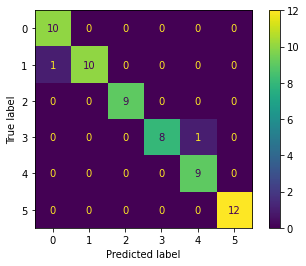

In [17]:
#  matricea de confuzie 
# perechile 0-0 1-1 2-2 3-3 4-4 5-5  de la testare si prezicere sunt bune 

plot_confusion_matrix (logistic, Xt, yt)  



Acuratetea dupa standartizarea datelor cu StandartScaler 
 1.0

Matricea de confuzie dupa standartizare cu StandardScaler  


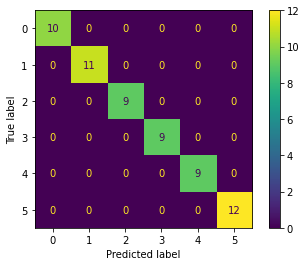

In [19]:
# standardizam datele Metoda 1 cu Standard Scaler  o facem aditional, pentru  a vedea daca  obtinem o acuratete mai buna  

std = StandardScaler ()
std.fit (Xa)
Xa_transformat = std.transform (Xa)
Xt_transformat =std.transform (Xt)

logistic.fit (Xa_transformat, ya)
yp = logistic.predict (Xt_transformat)

print ('\nAcuratetea dupa standartizarea datelor cu StandartScaler \n',accuracy_score (yp, yt))
print ('\nMatricea de confuzie dupa standartizare cu StandardScaler  ')


plot_confusion_matrix (logistic, Xt_transformat, yt)   # rezultatele sunt si mai bune 



Acuratetea dupa standartizarea datelor cu MinMaxScaler
 0.8833333333333333

Matricea de confuzie dupa standartizare cu MinMaxSaler 


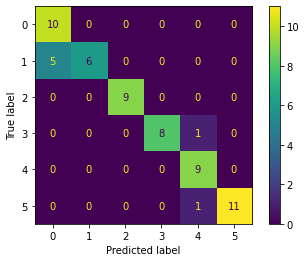

In [20]:
# standardizam datele Metoda 2 cu MinMaxScaler  o facem aditional, pentru  a vedea daca  obtinem o acuratete mai buna  

minmax = MinMaxScaler ()
minmax.fit (Xa)
Xa_transformat = minmax.transform (Xa)
Xt_transformat =minmax.transform (Xt)

# antrenam modelul 
logistic.fit (Xa_transformat, ya)
yp = logistic.predict (Xt_transformat)

print ('\nAcuratetea dupa standartizarea datelor cu MinMaxScaler\n',accuracy_score (yp, yt))
print ('\nMatricea de confuzie dupa standartizare cu MinMaxSaler ')


plot_confusion_matrix (logistic, Xt_transformat, yt)

Prezicerea 
 [2.2 0.4 3.  4.4 4.6 4.6 4.6 2.2 0.2 2.  4.6 2.  4.6 4.4 4.8 4.4 0.2 0.8
 2.6 0.6 0.2 0.4 4.4 3.4 4.4 3.2 1.  2.2 4.2 2.4 3.  4.4 2.  0.4 0.4 0.2
 0.2 4.4 0.8 4.4 4.6 4.4 4.6 0.  3.  0.2 4.6 3.  0.6 0.8 2.2 0.2 2.  0.6
 4.2 2.  4.4 2.2 0.8 0.8]

 Eroarea medie la patrat  0.19866666666666657

 Eroarea absoluta  0.3666666666666666

 Valorile prezise grupate 
  0    40
1    40
2    40
3    40
4    40
5    40
Name: Type, dtype: int64


     y testat  y prezis
0          2       2.2
1          0       0.4
2          3       3.0
3          4       4.4
4          4       4.6
5          5       4.6
6          5       4.6
7          2       2.2
8          0       0.2
9          2       2.0
10         4       4.6
11         2       2.0
12         5       4.6
13         4       4.4
14         5       4.8
15         5       4.4
16         0       0.2
17         1       0.8
18         3       2.6
19         0       0.6
20         0       0.2
21         1       0.4
22         5       4.

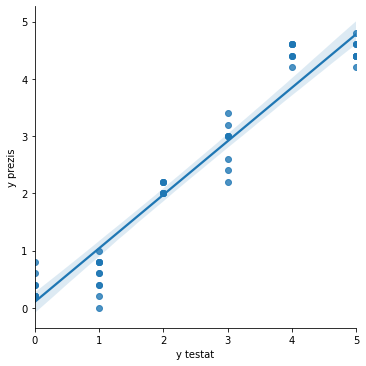

In [46]:
# metoda KNN

# Metoda I     Knn pe regresie  

knn = KNeighborsRegressor ()

knn.fit (Xa, ya)                       # potrivim datele antrenate si rezultatele antrenate   

yp = knn.predict (Xt)

print ('Prezicerea \n',yp )

# la regresie calculam eroare pentru a vedea cit de bine  lucreaza antrenarea
# mse  eroare patratica medie 
#  intre y prezis si y testare, y prezis in baza la X testare 

print ('\n Eroarea medie la patrat ',  mean_squared_error(yp, yt))
print ('\n Eroarea absoluta ', mean_absolute_error (yp,yt) )


print ('\n Valorile prezise grupate \n ',t['Type'].value_counts()) # numaram cite  valori sunt in coloana finala 



# formam un nou tabel din 2 coloane y testat si y prezis 
tabel = pd.DataFrame (yt,columns = ['y testat'])
tabel ['y prezis']=yp

print ('\n\n',tabel)


print ('\n\n--------------------------------------------------------------------Vizualizare grafica  y  testat si  y prezis ')

graficul = sns.lmplot (data=tabel, x='y testat', y = 'y prezis')   # unghiul de inclinare trebuie sa fie aroximativ 45 grade
print (graficul )




In [52]:
plot_confusion_matrix (knn,Xt,yt)

ValueError: plot_confusion_matrix only supports classifiers